# Regression with Automatic Differentiation in TensorFlow

# Task 1: TensorFlow

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

print('Using TensorFlow version:', tf.__version__)
print('Devices available:', tf.config.list_physical_devices())

Using TensorFlow version: 2.3.0
Devices available: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:XLA_CPU:0', device_type='XLA_CPU')]


# Task 2: Constants(immuable, read only, cannot update values)

In [ ]:
tf.constant([[1, 2, 3]])

<tf.Tensor: shape=(1, 3), dtype=int32, numpy=array([[1, 2, 3]])>

In [ ]:
tf.convert_to_tensor([[1, 2, 3]])

<tf.Tensor: shape=(1, 3), dtype=int32, numpy=array([[1, 2, 3]])>

In [ ]:
tf.convert_to_tensor([[1, 2, 3]], dtype=tf.float32)

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[1., 2., 3.]], dtype=float32)>

In [ ]:
tf.convert_to_tensor([[1, 2, 3]]).numpy() # numpy value

array([[1, 2, 3]])

# Task 3: Variables(Mutable)

In [ ]:
tf.Variable([[1, 2, 3]])

<tf.Variable 'Variable:0' shape=(1, 3) dtype=int32, numpy=array([[1, 2, 3]])>

In [ ]:
# unlike constants, we can add new values to varible
v = tf.Variable(1)
print('Init value: ', v.numpy())
v.assign(2)
print("new value: ", v.numpy())

Init value:  1
new value:  2


In [ ]:
c = tf.convert_to_tensor(np.random.randn(2, 3))
v = tf.Variable(np.random.randn(3, 1))
print(tf.matmul(c, v))

tf.Tensor(
[[ 0.15011085]
 [-0.99116384]], shape=(2, 1), dtype=float64)


# Task 4: Automatic Differentiation

Let's take a simple equation as an example:
\begin{equation}
y = x^3 ; \frac{dy}{dx} = 3x^2
\end{equation}

In [ ]:
# to do automatic differetiation, we need to keep track of this variable
x = tf.Variable(3.0)

# compute y within the context of gradient tape
with tf.GradientTape() as tape:
    y = x **3
    
dy_dx = tape.gradient(y, x)
print('gradient at x={} is {}'.format(x.numpy(), dy_dx.numpy()))

gradient at x=3.0 is 27.0


What about higher order gradients?

\begin{equation}
y = x^3 ; \frac{dy}{dx} = 3x^2 ; \frac{d^2 y}{dx^2} = 6x
\end{equation}

In [ ]:
# to do automatic differetiation, we need to keep track of this variable
x = tf.Variable(3.0)

# compute y within the context of gradient tape
with tf.GradientTape() as t1:
    with tf.GradientTape() as t2:
        y = x ** 3
    dy_dx = t2.gradient(y, x)
d2y_dx2 = t1.gradient(dy_dx, x)

print('2nd order of gradient at x={} is {}'.format(x.numpy(), d2y_dx2.numpy()))

2nd order of gradient at x=3.0 is 18.0


# Task 5: Watching Tensors

In [ ]:
# to do automatic differetiation, we need to keep track of this variable
x = tf.constant(3.0)

# compute y within the context of gradient tape
with tf.GradientTape() as tape:
    y = x **3
    
dy_dx = tape.gradient(y, x)
print('gradient at x={} is {}'.format(x.numpy(), dy_dx))

gradient at x=3.0 is None


In [ ]:
# to do automatic differetiation, we need to keep track of this variable
x = tf.constant(3.0)

# compute y within the context of gradient tape
with tf.GradientTape() as tape:
    tape.watch(x)
    y = x **3
    
dy_dx = tape.gradient(y, x)
print('gradient at x={} is {}'.format(x.numpy(), dy_dx.numpy()))

gradient at x=3.0 is 27.0


# Task 6: Persistent Tape

\begin{equation}
y = x^3 ; z = 2y ; \frac{dz}{dx} = \frac{dz}{dy} . \frac{dy}{dx}
\end{equation}

In [ ]:
x = tf.Variable(3.0)

# with tf.GradientTape() as tape:
with tf.GradientTape(persistent=True) as tape: # can use tape.gradient multiple times
    y = x ** 3
    z = 2 * y

dz_dy = tape.gradient(z, y)
dy_dx = tape.gradient(y, x)
dz_dx = tape.gradient(z, x)

del tape

print('dz_dy: ', dz_dy.numpy()) # can only call tape.gradient only once
print('dy_dx: ', dy_dx.numpy())
print('dz_dx: ', dz_dx.numpy())


dz_dy:  2.0
dy_dx:  27.0
dz_dx:  54.0


# Task 7: Generating Data for Linear Regression

Solve a simple linear equation:

\begin{equation}
y = wx + b
\end{equation}

In [ ]:
true_w, true_b = 7., 4.  # best fit value for wx + b

def create_batch(batch_size=64):
    x = np.random.randn(batch_size, 1)
    y = np.random.randn(batch_size, 1) + true_w * x + true_b # added noise for challenging, random noise
    return x, y
    

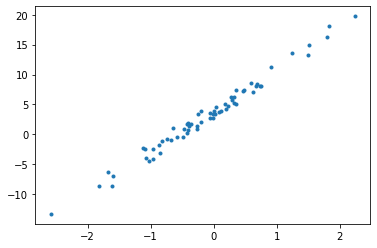

In [ ]:
x, y = create_batch()
plt.plot(x, y, '.')

# Task 8: Linear Regression

In [ ]:
iterations = 100 # gradient steps of algorithm 
lr = 0.03

w_history = []
b_history = []

w = tf.Variable(10.0)
b = tf.Variable(1.0)

for i in range (0, iterations):
    x_batch, y_batch = create_batch()
    x_batch = tf.convert_to_tensor(x_batch, dtype=tf.float32)
    y_batch = tf.convert_to_tensor(y_batch, dtype=tf.float32)
    
    with tf.GradientTape(persistent=True) as tape:
        y = b + w * x_batch
        loss = tf.reduce_mean(tf.square(y-y_batch)) # find mse, difference between predicted value and ground truth 
    dw = tape.gradient(loss, w) # dloss_dw   
    db = tape.gradient(loss, b) #dloss_db
    
    del tape
    w.assign_sub(lr * dw) # substract the value of lr * dw from w and assign to w
    b.assign_sub(lr * db)
    
    w_history.append(w.numpy())
    b_history.append(b.numpy())
    
    if i % 10 == 0:
        print('Iter {}, W={}, b={}'.format(i, w.numpy(), b.numpy()))
    
    
    

Iter 0, W=9.823647499084473, b=1.1536812782287598
Iter 10, W=8.599135398864746, b=2.432640314102173
Iter 20, W=7.931622505187988, b=3.1415154933929443
Iter 30, W=7.4653191566467285, b=3.553311586380005
Iter 40, W=7.256165981292725, b=3.7570266723632812
Iter 50, W=7.132327079772949, b=3.89072847366333
Iter 60, W=7.07118558883667, b=3.949157238006592
Iter 70, W=7.039575099945068, b=3.9779489040374756
Iter 80, W=6.9923834800720215, b=3.985065460205078
Iter 90, W=6.984748363494873, b=4.0071258544921875


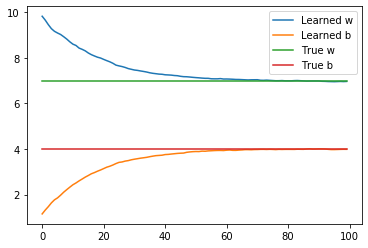

In [ ]:
plt.plot(range(iterations), w_history, label='Learned w')
plt.plot(range(iterations), b_history, label='Learned b')
plt.plot(range(iterations), [true_w] * iterations, label='True w')
plt.plot(range(iterations), [true_b] * iterations, label='True b')
plt.legend()
plt.show()

In [3]:
x = tf.Variable(2.0)
with tf.GradientTape() as tape:
    y = 3*x + x**2
dy_dx = tape.gradient(y, x)
print(dy_dx.numpy())

7.0
